In [ ]:
#TODO:implement rotation checking for images????
#TODO: implement orientation checking for images
#TODO: test using performance vs epoch graphs etc

In [1]:
import numpy as np
import imageio
import cv2
import matplotlib.pyplot
import imutils
#import scipy
#from scipy import special
from PIL import Image
import math

In [2]:
class NeuralNetwork:
    
    #initialise neural network
    def __init__(self, givenINodes, givenHNodes, givenONodes, givenLearningRate):
        #setup number of nodes in each layer
        self.inputNodes = givenINodes
        self.hiddenNodes = givenHNodes
        self.outputNodes = givenONodes
        
        #setup weights with initial values
        self.weightsInputHidden = np.random.normal(0.0, pow(self.inputNodes, -0.5), (self.hiddenNodes, self.inputNodes))
        self.weightsHiddenOutput = np.random.normal(0.0, pow(self.hiddenNodes, -0.5), (self.outputNodes, self.hiddenNodes))
        
        #setup learning rate
        self.learningRate = givenLearningRate
        
        #setup activation function
        #self.activationFunc = lambda x: scipy.special.expit(x)
        self.activationFunc = lambda x: self.sigmoid(x)
            
        pass
            
    def sigmoid(self, Z):
        A = 1 / (1 + np.exp(-Z))
        return A
    
    #train the neural network
    def train(self, givenInputs, givenTargets):
        #inputs and target lists turned into 2D arrays
        inputs = np.array(givenInputs, ndmin=2).T
        targets = np.array(givenTargets, ndmin=2).T
        
        #signals into hidden layer calculated
        hiddenInputs = np.dot(self.weightsInputHidden, inputs)
        #signals coming from hidden layer calculated
        hiddenOutputs = self.activationFunc(hiddenInputs)
        
        #signals into output layer calculated
        finalInputs = np.dot(self.weightsHiddenOutput, hiddenOutputs)
        #signals from output layer calculated
        finalOutputs = self.activationFunc(finalInputs)
        
        #error backpropagation:
        #errors from output layer
        outputErrors = targets - finalOutputs
        #errors from hidden layer
        hiddenErrors = np.dot(self.weightsHiddenOutput.T, outputErrors)
        
        #weight links updated between all layers
        self.weightsHiddenOutput += self.learningRate * np.dot((outputErrors * finalOutputs * (1.0 - finalOutputs)), np.transpose(hiddenOutputs))
        self.weightsInputHidden += self.learningRate * np.dot((hiddenErrors * hiddenOutputs * (1.0 - hiddenOutputs)), np.transpose(inputs))
        
        pass
    
    #query the neural network
    def query(self, givenInputs):
        #inputs list converted into a 2D array
        inputs = np.array(givenInputs, ndmin=2).T
        
        #signals into hidden layer calculated
        hiddenInputs = np.dot(self.weightsInputHidden, inputs)
        #signals coming from hidden layer calculated
        hiddenOutputs = self.activationFunc(hiddenInputs)
        
        #signals into output layer calculated
        finalInputs = np.dot(self.weightsHiddenOutput, hiddenOutputs)
        #final signals from neural net calculated
        finalOutputs = self.activationFunc(finalInputs)
        
        return finalOutputs
    
        

In [3]:
#set number of nodes in each layer
inputNodes = 2025 #2025
hiddenNodes = 700
outputNodes = 11

#set learning rate
learningRate = 0.37

#an instance of the neural network created
n = NeuralNetwork(inputNodes, hiddenNodes, outputNodes, learningRate)

In [4]:
#open training data file in READ mode
#trainingDataFile = open("mnist_dataset/mnist_train.csv",'r')
trainingDataFile = open("dataset_pixels.csv",'r')
#save all the lines from the file into a list
trainingDataList = trainingDataFile.readlines()
#close the file
trainingDataFile.close()

trainingDataLabelsFile = open("dataset_labels.txt",'r')
#save all the lines from the file into a list
trainingDataLabelsList = trainingDataLabelsFile.readlines()
#close the file
trainingDataLabelsFile.close()

#DEBUG
#print(trainingDataList)
#print("--")
#print(trainingDataLabelsList)

In [5]:
#trainPrep
#number of times training data used for training
epochs = 10
sampleSize = 100

for e in range(epochs):
    #for every record in the training data
    for record in trainingDataList:
        #split each record by the commas
        allVals = record.split(',')
        #scale and shift the inputs
        #inputs = (np.asfarray(allVals[1:]) / 255.0 * 0.99) + 0.01
        inputs = (np.asfarray(allVals) / 255.0 * 0.99) + 0.01
        
        #target output values created
        targets = np.zeros(outputNodes) + 0.01
        #targets[int(allVals[0])] = 0.99
        #targets[int(trainingDataLabelsList[record])] = 0.99
        currentIndex = trainingDataList.index(record)
        #print(currentIndex)
        targets[(math.ceil(currentIndex/sampleSize))-1] = 0.99
        n.train(inputs, targets)
        
        pass
    #print(len(allVals))
    #print(len(trainingDataLabelsList))
    #print(targets)
    #for c in range(0, len(trainingDataLabelsList)):
    #    targets[c] = 0.99
    #n.train(inputs, targets)
    pass

#print(allVals)
#print(inputs[166])
#print(targets)

In [12]:
im = Image.open('separated/3.png') 
sqrWidth = np.ceil(np.sqrt(im.size[0]*im.size[1])).astype(int) 
im_resize = im.resize((sqrWidth, sqrWidth)) 
im_resize.save('output.png')

Loading image...
Min: 0.01
Max: 0.98107606
[[3.28030725e-03]
 [4.48026594e-04]
 [8.47429585e-03]
 [3.24707263e-03]
 [3.29160695e-03]
 [6.35382965e-02]
 [1.54935903e-02]
 [2.41737217e-04]
 [2.36384366e-01]
 [3.83356673e-02]
 [7.72652944e-01]]
10
Predicted value: 3



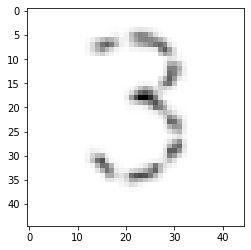

In [13]:
print ("Loading image...")
imageArray = imageio.imread('output.png', as_gray=True)

imageRotated = imutils.rotate(imageArray, 360)
#imageResized = imageRotated.reshape(28,28)
imageResized = cv2.resize(imageRotated, (45, 45), cv2.INTER_AREA)

imageData = 255.0 - imageResized.reshape(2025)
imageData = (imageData / 255.0 * 0.99) + 0.01

print ("Min:", np.min(imageData))
print ("Max:", np.max(imageData))

matplotlib.pyplot.imshow(imageData.reshape(45,45), cmap='Greys', interpolation='None')

outputs = n.query(imageData)

print (outputs)

#label = np.argmax(outputs)
labelIndex = np.argmax(outputs)
print(labelIndex)
label = trainingDataLabelsList[(labelIndex*sampleSize)+1]
print ("Predicted value:", label)